In [13]:
#firstly lets import thee libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [4]:
#Read file and drop missing values
df = pd.read_csv("kyphosis.csv")
df.dropna

<bound method DataFrame.dropna of    Kyphosis  Age  Number  Start
0    absent   71       3      5
1    absent  158       3     14
2   present  128       4      5
3    absent    2       5      1
4    absent    1       4     15
..      ...  ...     ...    ...
76  present  157       3     13
77   absent   26       7     13
78   absent  120       2     13
79  present   42       7      6
80   absent   36       4     13

[81 rows x 4 columns]>

In [5]:
#Create an instance for a label encoder function
LabelEncoder_y=LabelEncoder()

In [6]:
#converts Kyphosis column from absent and present to zeros and ones
df['Kyphosis'] = LabelEncoder_y.fit_transform(df['Kyphosis'])
Kyphosis_True = df[df['Kyphosis']==1]
Kyphosis_False = df[df['Kyphosis']==0]

Disease present after operation percentage = 20.98765432098765 %


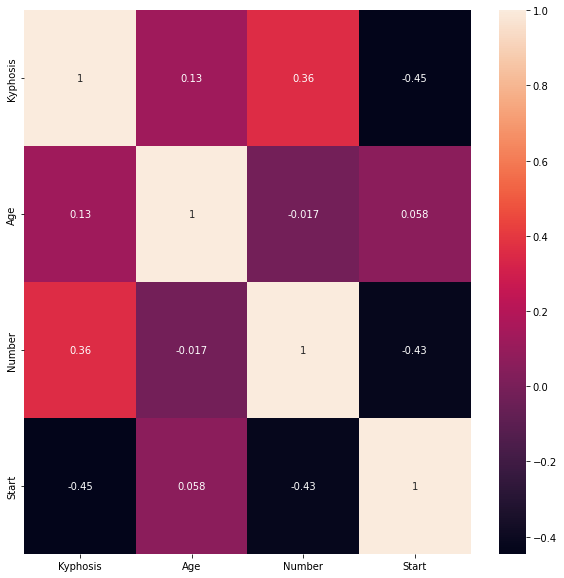

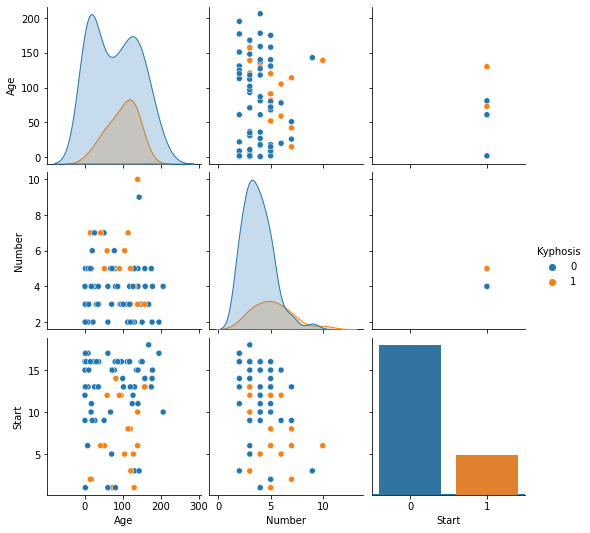

In [14]:
# Now let's visualize data after transforming
print("Disease present after operation percentage =",(len(Kyphosis_True)/len(df)*100),"%")
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
sns.pairplot(df, hue = 'Kyphosis')
sns.countplot(x = df['Kyphosis'])
plt.show()


In [15]:
#split data to train and test sets
X = df[['Age','Number','Start']]
y = df['Kyphosis']
X_train,x_test,Y_train,y_test = train_test_split(X,y,test_size=0.3)


In [16]:
#now let's train the data on a logistic regression model
lr = LogisticRegression()
Z = lr.fit(X_train,Y_train)

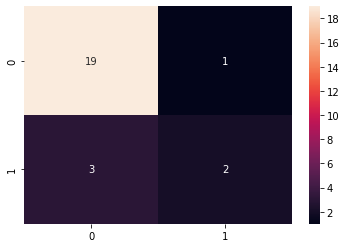

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        20
           1       0.67      0.40      0.50         5

    accuracy                           0.84        25
   macro avg       0.77      0.68      0.70        25
weighted avg       0.82      0.84      0.82        25



In [17]:
#See model train results and evaluate them using confusion matrix and classification report
y_predict = lr.predict(x_test)
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)
plt.show()
print(classification_report(y_test,y_predict))

In [18]:
#Train a Decision Tree model
tree = DecisionTreeClassifier()
tree.fit(X_train,Y_train)

DecisionTreeClassifier()

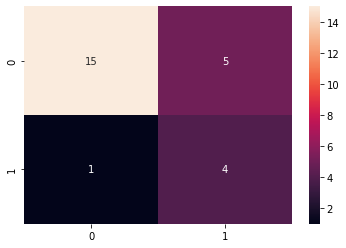

              precision    recall  f1-score   support

           0       0.94      0.75      0.83        20
           1       0.44      0.80      0.57         5

    accuracy                           0.76        25
   macro avg       0.69      0.78      0.70        25
weighted avg       0.84      0.76      0.78        25



In [20]:
#Test the Decision Tree model
y_predict = tree.predict(x_test)
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)
plt.show()
print(classification_report(y_test,y_predict))

In [21]:
#Train a random forest classification model
R = RandomForestClassifier()
R.fit(X_train,Y_train)

RandomForestClassifier()

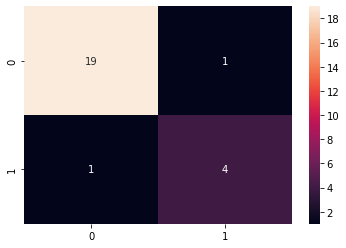

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.80      0.80      0.80         5

    accuracy                           0.92        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.92      0.92      0.92        25



In [22]:
#Test the random forest classification model
y_predict = R.predict(x_test)
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)
plt.show()
print(classification_report(y_test,y_predict))